In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from SideWindowFilter import SideWindowFiltering_3d

# Read image and add noise

In [2]:
img = cv2.imread('aiaceo.jpg')

In [3]:
def SaltNoise(img, percetage):
    NoiseNum = int(percetage * img.shape[0] * img.shape[1])

    randX = np.random.randint(0, img.shape[0], NoiseNum)
    randY = np.random.randint(0, img.shape[1], NoiseNum)

    img[randX, randY] = 255

    return img

In [4]:
salt_img = SaltNoise(img.copy(), 0.2)

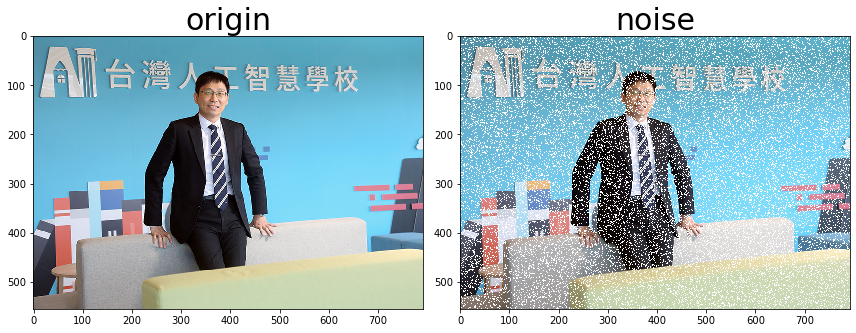

In [5]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.title('origin', {'fontsize':30})
plt.subplot(122)
plt.imshow(salt_img[:,:,::-1])
plt.title('noise', {'fontsize':30})
plt.tight_layout()

# SideWindowFilter Mean Blur with (3, 3) kernel

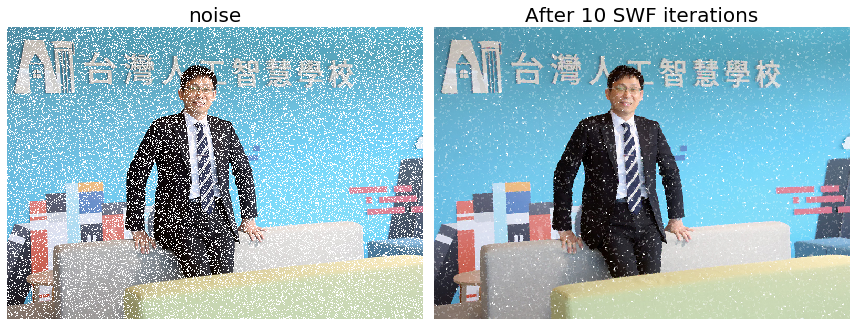

In [6]:
swf_img = salt_img.copy()

for i in range(10):
    swf_img = SideWindowFiltering_3d(swf_img, kernel=3)
    
    # =================== imshow =================== #
    plt.figure(figsize=(12,8))
    plt.subplot(121);
    plt.imshow(salt_img[:,:,::-1]);
    plt.title('noise', {'fontsize':20})
    plt.axis('off')
    plt.subplot(122);
    plt.imshow(swf_img[:,:,::-1]);
    plt.title('After %d SWF iterations'%(i+1), {'fontsize':20})
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    clear_output(wait=True)
    # =================== imshow =================== #

# Compare to original mean blur

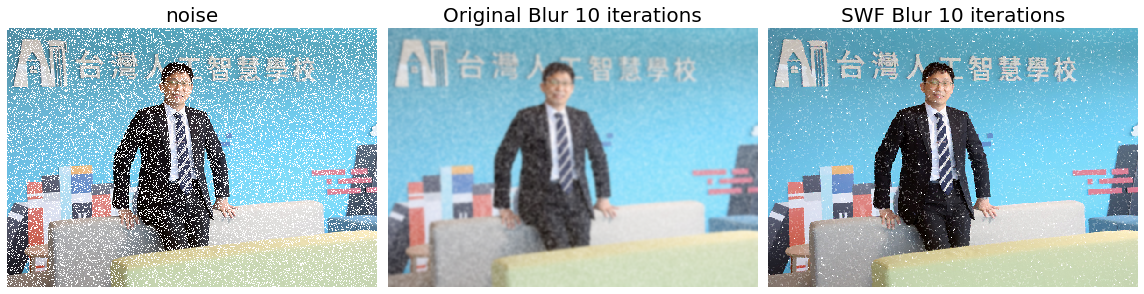

In [7]:
ori_img = salt_img.copy()
swf_img = salt_img.copy()

for i in range(10):
    ori_img = cv2.blur(ori_img, (3, 3))
    swf_img = SideWindowFiltering_3d(swf_img, kernel=3)
    
    # =================== imshow =================== #
    plt.figure(figsize=(16,8))
    plt.subplot(131);
    plt.imshow(salt_img[:,:,::-1]);
    plt.title('noise', {'fontsize':20})
    plt.axis('off')
    plt.subplot(132);
    plt.imshow(ori_img[:,:,::-1]);
    plt.title('Original Blur %d iterations'%(i+1), {'fontsize':20})
    plt.axis('off')
    plt.subplot(133);
    plt.imshow(swf_img[:,:,::-1]);
    plt.title('SWF Blur %d iterations'%(i+1), {'fontsize':20})
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    clear_output(wait=True)
    # =================== imshow =================== #

# Compare different kernel size

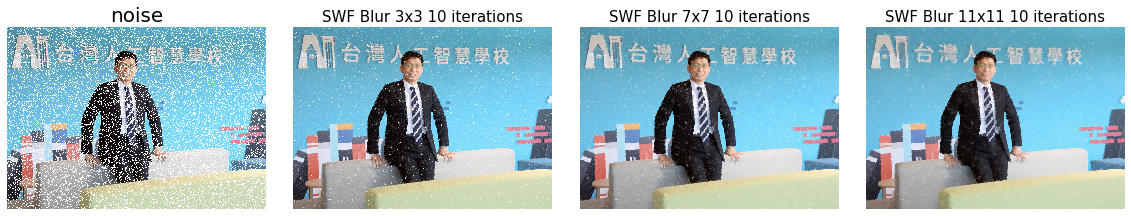

In [8]:
swf_img3 = salt_img.copy()
swf_img7 = salt_img.copy()
swf_img11 = salt_img.copy()

for i in range(10):
    swf_img3 = SideWindowFiltering_3d(swf_img, kernel=3)
    swf_img7 = SideWindowFiltering_3d(swf_img, kernel=7)
    swf_img11 = SideWindowFiltering_3d(swf_img, kernel=11)
    
    # =================== imshow =================== #
    plt.figure(figsize=(16,8))
    plt.subplot(141);
    plt.imshow(salt_img[:,:,::-1]);
    plt.title('noise', {'fontsize':20})
    plt.axis('off')
    plt.subplot(142);
    plt.imshow(swf_img3[:,:,::-1]);
    plt.title('SWF Blur 3x3 %d iterations'%(i+1), {'fontsize':15})
    plt.axis('off')
    plt.subplot(143);
    plt.imshow(swf_img7[:,:,::-1]);
    plt.title('SWF Blur 7x7 %d iterations'%(i+1), {'fontsize':15})
    plt.axis('off')
    plt.subplot(144);
    plt.imshow(swf_img11[:,:,::-1]);
    plt.title('SWF Blur 11x11 %d iterations'%(i+1), {'fontsize':15})
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    clear_output(wait=True)
    # =================== imshow =================== #

# Compare base & big side window filter

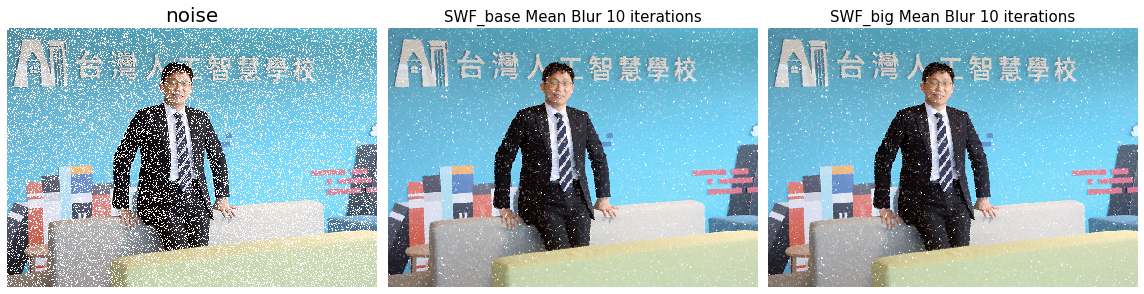

In [9]:
base_img = salt_img.copy()
big_img = salt_img.copy()

for i in range(10):
    base_img = SideWindowFiltering_3d(base_img, kernel=3, mode='mean', use_big=False)
    big_img  = SideWindowFiltering_3d(big_img, kernel=3, mode='mean', use_big=True)
    
    # =================== imshow =================== #
    plt.figure(figsize=(16,8))
    plt.subplot(131);
    plt.imshow(salt_img[:,:,::-1]);
    plt.title('noise', {'fontsize':20})
    plt.axis('off')
    plt.subplot(132);
    plt.imshow(base_img[:,:,::-1]);
    plt.title('SWF_base Mean Blur %d iterations'%(i+1), {'fontsize':15})
    plt.axis('off')
    plt.subplot(133);
    plt.imshow(big_img[:,:,::-1]);
    plt.title('SWF_big Mean Blur %d iterations'%(i+1), {'fontsize':15})
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    clear_output(wait=True)
    # =================== imshow =================== #

# Compare mean & median filter
* warning: median method takes more time

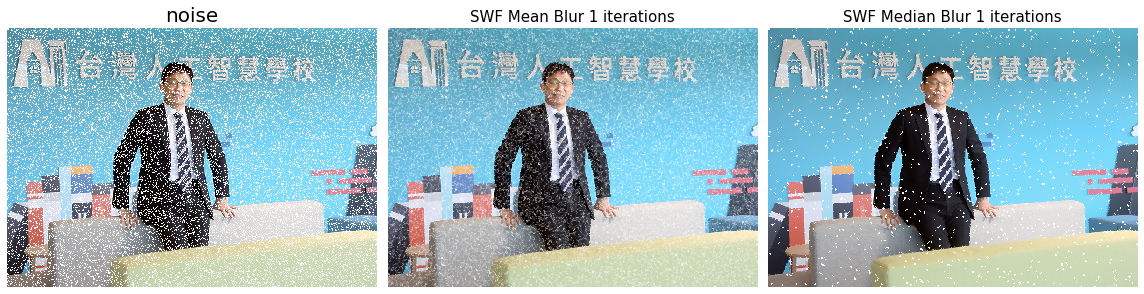

In [10]:
mean_img = salt_img.copy()
median_img = salt_img.copy()

for i in range(10):
    mean_img   = SideWindowFiltering_3d(mean_img, kernel=5, mode='mean')
    median_img = SideWindowFiltering_3d(median_img, kernel=5, mode='median')
    
    # =================== imshow =================== #
    plt.figure(figsize=(16,8))
    plt.subplot(131);
    plt.imshow(salt_img[:,:,::-1]);
    plt.title('noise', {'fontsize':20})
    plt.axis('off')
    plt.subplot(132);
    plt.imshow(mean_img[:,:,::-1]);
    plt.title('SWF Mean Blur %d iterations'%(i+1), {'fontsize':15})
    plt.axis('off')
    plt.subplot(133);
    plt.imshow(median_img[:,:,::-1]);
    plt.title('SWF Median Blur %d iterations'%(i+1), {'fontsize':15})
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    clear_output(wait=True)
    # =================== imshow =================== #
    
    break

# Compare execution time

In [27]:
for use_big in [False, True]:
    print(use_big)
    for mode in ['mean', 'median']:
        print(use_big, mode)
        for kernel in range(3, 12, 2):
            print(use_big, mode, kernel)
            %timeit SideWindowFiltering_3d(salt_img.copy(), kernel, mode, use_big)

False
False mean
False mean 3
43.8 ms ± 834 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
False mean 5
59.2 ms ± 58.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
False mean 7
88.8 ms ± 307 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
False mean 9
140 ms ± 203 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
False mean 11
189 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
False median
False median 3
11.8 s ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
False median 5
15.3 s ± 40.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
False median 7
22.8 s ± 47.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
False median 9
31.5 s ± 51.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
False median 11
42.8 s ± 100 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
True
True mean
True mean 3
62.9 ms ± 365 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
True mean 5
86.1 ms ± 120 µs per loop (mean ±